## Observations and Insights

There were an equal amount of female and male mice tested, so the results may mean these drugs were tested equally on either gender. However, further analysis would be required to see if that is entirely accurate.

The two top performers were undoubtedly Capomulin and Ramicane. Although Capomulin seemed to be the number one performer overall, Ramicane had slightly lower values across the board regarding the average and median tumor volumes, variance, standard deviation, and standard error.

According to the scatter plot showing average tumor volume and mouse weight, there seems to be a fairly direct, positive correlation between the weight of the mouse and the volume of the tumor.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# focus on data we are interested in
drug_results = mouse_study_df.loc[:,["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
drug_results.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Ramicane,0,45.000000
1,Ramicane,5,38.825898
2,Ramicane,10,35.014271
3,Ramicane,15,34.223992
4,Ramicane,20,32.997729


## Summary statistics

In [6]:
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_mean = drug_results.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = drug_results.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = drug_results.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_sem = drug_results.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_std = drug_results.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Average Tumor Volume (mm3)": tumor_mean,
                       "Median Tumor Volume (mm3)": tumor_median,
                       "Variance": tumor_var,
                       "Standard Deviation": tumor_std,
                       "Standard Error": tumor_sem})
# formatting
summary["Average Tumor Volume (mm3)"] = summary["Average Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Median Tumor Volume (mm3)"] = summary["Median Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Variance"] = summary["Variance"].map("{:.2f}".format)
summary["Standard Deviation"] = summary["Standard Deviation"].map("{:.2f}".format)
summary["Standard Error"] = summary["Standard Error"].map("{:.2f}".format)

# print dataframe
summary

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [7]:
# data_counts_pd = drug_results("Drug Regimen").value_counts()
# TypeError: 'DataFrame' object is not callable
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

Text(0.5, 1.0, 'Data Points Count for Each Treatment Regimen')

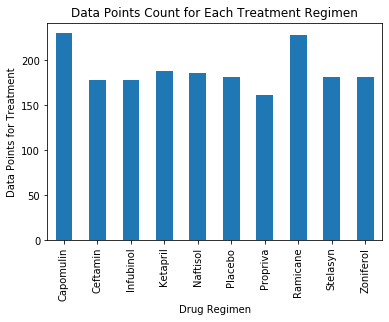

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count data points
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

# create bar plot using pandas
pandas_bar = data_counts.plot(kind="bar")
#data_counts.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Data Points for Treatment")
pandas_bar.set_title("Data Points Count for Each Treatment Regimen")

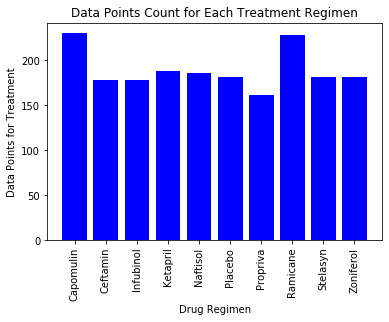

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# count data points
data_counts = pd.DataFrame(drug_results.groupby("Drug Regimen").count()["Timepoint"])
data_counts
#drugs = drug_results("Drug Regimen").count()
plt.bar(data_counts.index, data_counts["Timepoint"], color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points for Treatment")
plt.title("Data Points Count for Each Treatment Regimen")
plt.xticks(rotation=90)

# save figure
plt.savefig("images/drug_regimen_counts_MLB.png")

## Pie plots

In [10]:
# focus data on female and male mice
gender = mouse_study_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
gender_counts = gender["Sex"].value_counts()

Text(0.5, 1.0, 'Gender Distribution of Tested Mice')

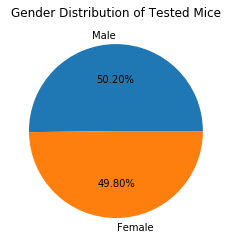

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pd = gender_counts.plot(kind="pie", autopct="%.2f%%", label="")
gender_pd.set_title("Gender Distribution of Tested Mice")

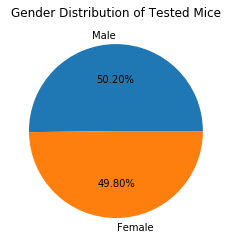

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = gender["Sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%.2f%%")
plt.title("Gender Distribution of Tested Mice")

# save figure
plt.savefig("images/gender_dist_MLB.png")

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
best_performers = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
final_best = best_performers.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last()
final_best.head()

Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a275      Ceftamin        62.999356
a411      Ramicane        38.407618
a444      Ramicane        43.047543
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# final for capomulin
capomulin = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin"])]
final_capomulin = pd.DataFrame(capomulin.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last())
# iqr for capomulin
cap_quart = final_capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quart[.25]
cap_upperq = cap_quart[.75]
cap_iqr = cap_upperq-cap_lowerq
# find potential outliers for Capomulin
cap_low_bound = cap_lowerq-(1.5*cap_iqr)
cap_upper_bound = cap_upperq+(1.5*cap_iqr)
print(f"Values below {cap_low_bound} could be outliers for Capomulin.")
print(f"Values above {cap_upper_bound} could be outliers for Capomulin.\n")

# final for Ramicane
ramicane = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Ramicane"])]
final_ramicane = pd.DataFrame(ramicane.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last())
# iqr for Ramicane
ram_quart = final_ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quart[.25]
ram_upperq = ram_quart[.75]
ram_iqr = ram_upperq-ram_lowerq
# find potential outliers for Ramicane
ram_low_bound = ram_lowerq-(1.5*ram_iqr)
ram_upper_bound = ram_upperq+(1.5*ram_iqr)
print(f"Values below {ram_low_bound} could be outliers for Ramicane.")
print(f"Values above {ram_upper_bound} could be outliers for Ramicane.\n")

# final for Infubinol
infubinol = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Infubinol"])]
final_infubinol = pd.DataFrame(infubinol.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last())
# iqr for Infubinol
inf_quart = final_infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quart[.25]
inf_upperq = inf_quart[.75]
inf_iqr = inf_upperq-inf_lowerq
# find potential outliers for Infubinol
inf_low_bound = inf_lowerq-(1.5*inf_iqr)
inf_upper_bound = inf_upperq+(1.5*inf_iqr)
print(f"Values below {inf_low_bound} could be outliers for Infubinol.")
print(f"Values above {inf_upper_bound} could be outliers for Infubinol.\n")

# final for Ceftamin
ceftamin = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Ceftamin"])]
final_ceftamin = pd.DataFrame(ceftamin.groupby(["Mouse ID","Drug Regimen"])["Tumor Volume (mm3)"].last())
# iqr for Ceftamin
cef_quart = final_ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq = cef_quart[.25]
cef_upperq = cef_quart[.75]
cef_iqr = cef_upperq-cef_lowerq
# find potential outliers for Ramicane
cef_low_bound = cef_lowerq-(1.5*cef_iqr)
cef_upper_bound = cef_upperq+(1.5*cef_iqr)
print(f"Values below {cef_low_bound} could be outliers for Ceftamin.")
print(f"Values above {cef_upper_bound} could be outliers for Ceftamin.")


Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.

Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.

Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.

Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


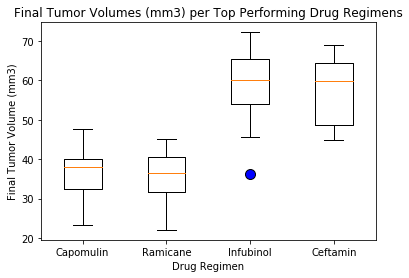

In [15]:
# was receiving ValueError: cannot copy sequence with size 25 to array axis with dimension 1 when trying to do plt.boxplot with all four individual drug regimen calculations.
# found this solution on stackoverflow: https://stackoverflow.com/questions/32948867/valueerror-cannot-copy-sequence-with-size-5-to-array-axis-with-dimension-2
result = np.empty(4, dtype=object)
result[:] = [final_capomulin, final_ramicane, final_infubinol, final_ceftamin]

flierprops = dict(marker='o', markerfacecolor='b', markersize=10)
# create a boxplot
plt.boxplot(result,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Final Tumor Volumes (mm3) per Top Performing Drug Regimens")

# save figure
plt.savefig("images/top_drug_tumvol_MLB.png")

## Line and scatter plots

In [16]:
# find a single mouse to study
capomulin_stats = mouse_study_df.loc[mouse_study_df["Drug Regimen"].isin(["Capomulin"])]
# selecting mouse s185
cap_s185 = capomulin_stats.loc[capomulin_stats["Mouse ID"].isin(["s185"])]

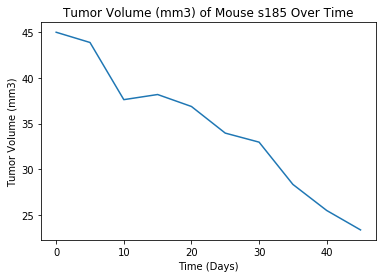

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(cap_s185["Timepoint"],cap_s185["Tumor Volume (mm3)"])
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) of Mouse s185 Over Time")

# save figure
plt.savefig("images/capomulin_tumvol_results_MLB.png")

In [18]:
# calculate mean data for each mouse tested with Capomulin
cap_mean = capomulin_stats.groupby("Mouse ID").mean()

Text(0.5, 1.0, 'Average Tumor Volume (mm3) versus Mouse Weight (g)')

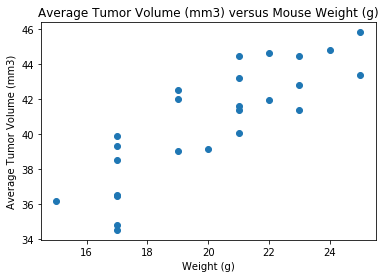

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_tumor_plot = plt.scatter(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight (g)")

In [20]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
print(f"The correlation between the average tumor weight (mm3) and the mouse's weight is {round(correlation[0],2)}")

The correlation between the average tumor weight (mm3) and the mouse's weight is 0.84


The r-squared is 0.7088568047708717.


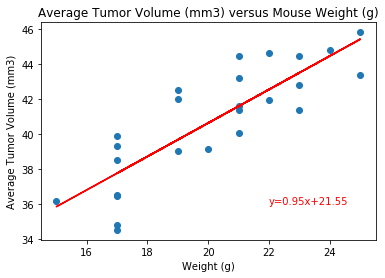

In [21]:
# calculate linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen
# define x and y values to call later
x_values = cap_mean["Weight (g)"]
y_values = cap_mean["Tumor Volume (mm3)"]

# define values using the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regress values
regress_values = x_values * slope + intercept

# compose the equation of the best fit line
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# plot the data for the average tumor volume and weight and apply the best fit line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# add the best fit line
plt.annotate(line_eq,(22,36), fontsize=10, color="red")

# add axes labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight (g)")

# calculate the r-squared value and print
r_squared = rvalue**2
print(f"The r-squared is {r_squared}.")

# save plot
plt.savefig("images/avg_tumor_vol_MPL.png")